In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from data_loaders import model_names
from data_loaders import load_ens
from data_loaders import load_nature

from calpycles.enkf_calibration import EnKFcalibration
from calpycles.plotting.ens_obs import plot_ens_obs
from calpycles.DYCOMS_RF01.measurements import MeasurementsDYCOMS_RF01

Using custom matplotlib style from 'mplstyle' file


In [3]:
meas = MeasurementsDYCOMS_RF01()

In [4]:
### CHANGE MEAS DATA

meas_loww = MeasurementsDYCOMS_RF01()

meas_name_loww = "LOW-W"

# Higher ww, www var -> stabilize lowres, num
meas_loww.modify_var_profile(name="w_mean2", std_factor=4)
meas_loww.modify_var_profile(name="w_mean3", std_factor=4)

In [5]:
### CHANGE MEAS DATA

meas_zbaseh = MeasurementsDYCOMS_RF01()

meas_name_zbaseh = "ZBASE-LOW-W"

# Higher ww, www var -> stabilize lowres, num
meas_zbaseh.modify_var_profile(name="w_mean2", std_factor=4)
meas_zbaseh.modify_var_profile(name="w_mean3", std_factor=4)

# Lower cloud base var -> fix weno
meas_zbaseh.modify_var_ts(
    std_factors = {
        "ztoph": 1,
        "ztopr": 1,
        "zbaseh": 1/4,  ### JUST REDUCE VAR FOR BASE HEIGHT TO FORCE FIT
        "zbaser": 1,
    }
)

In [6]:
### CHANGE MEAS DATA

meas_ztop = MeasurementsDYCOMS_RF01()

meas_name_ztop = "ZBASE-LOW-W"

# Higher ww, www var -> stabilize lowres, num
meas_ztop.modify_var_profile(name="w_mean2", std_factor=4)
meas_ztop.modify_var_profile(name="w_mean3", std_factor=4)

# Lower cloud base var -> fix weno
meas_ztop.modify_var_ts(
    std_factors = {
        "ztoph": 1/4,
        "ztopr": 1/4,
        "zbaseh": 1,
        "zbaser": 1,
    }
)

In [7]:
from calpycles.enkf_calibration import get_data

ensembles = {
    model_name: load_ens(model_name) for model_name in model_names
}

y, hnoise = get_data(meas=meas_loww)
DAs_loww = {
    model_name: EnKFcalibration(
        ensembles[model_name],
        y.copy(), # modified 
        hnoise, # modified
        plot_folder = f"figs/{model_name}/REAL_{meas_name_loww}/",
        # name = "",
    ) for model_name in model_names
}

y, hnoise = get_data(meas=meas_zbaseh)
DAs_zbaseh= {
    model_name: EnKFcalibration(
        ensembles[model_name],
        y.copy(), # modified 
        hnoise, # modified
        plot_folder = f"figs/{model_name}/REAL_{meas_name_zbaseh}/",
        # name = "",
    ) for model_name in model_names
}

y, hnoise = get_data(meas=meas_ztop)
DAs_ztop = {
    model_name: EnKFcalibration(
        ensembles[model_name],
        y.copy(), # modified 
        hnoise, # modified
        plot_folder = f"figs/{model_name}/REAL_{meas_name_ztop}/",
        # name = "",
    ) for model_name in model_names
}

Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64_seed0...
... done loading samples for ensemble DYCOMS_RF01_N64_seed0.
Loaded observation DYCOMS_RF01_N64_seed0 from ./data/WENO_FULLRES/DYCOMS_RF01_N64_seed0/samples_observations.nc.
Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/WENO_LOWRES/DYCOMS_RF01_N64/samples_parameters_unconstrained.npy
Loading 64 samples for ensemble DYCOMS_RF01_N64...
... done loading samples for ensemble DYCOMS_RF01_N64.
Loaded observation DYCOMS_RF01_N64 from ./data/WENO_LOWRES/DYCOMS_RF01_N64/samples_observations.nc.
Using default parameter properties in parameter ensemble init.
Using specified parameter ranges to assemble dist_kwargs.
Loaded parameter samples from  ./data/MIXED_FULLRE

In [8]:
# original
DAs = {
    model_name: EnKFcalibration(
        ensembles[model_name],
        # y.copy(), # modified 
        # hnoise, # modified
        plot_folder = f"figs/{model_name}/REAL/",
        # name = "",
    ) for model_name in model_names
}

In [9]:
### plot post dist comparison

from calpycles.plotting.distributions import plot_samples_1d
from calpycles.parameters import ParametersDYCOMS_RF01 
PARAMS = ParametersDYCOMS_RF01()

from calpycles.plotting import COLORS
C_PRIOR = COLORS[0]
C_WENO_FULLRES = COLORS[1]
C_CENTRAL = COLORS[3]
C_WENO_LOWRES = COLORS[4]
C_WENO_FULLRES_SYNTH = COLORS[5]

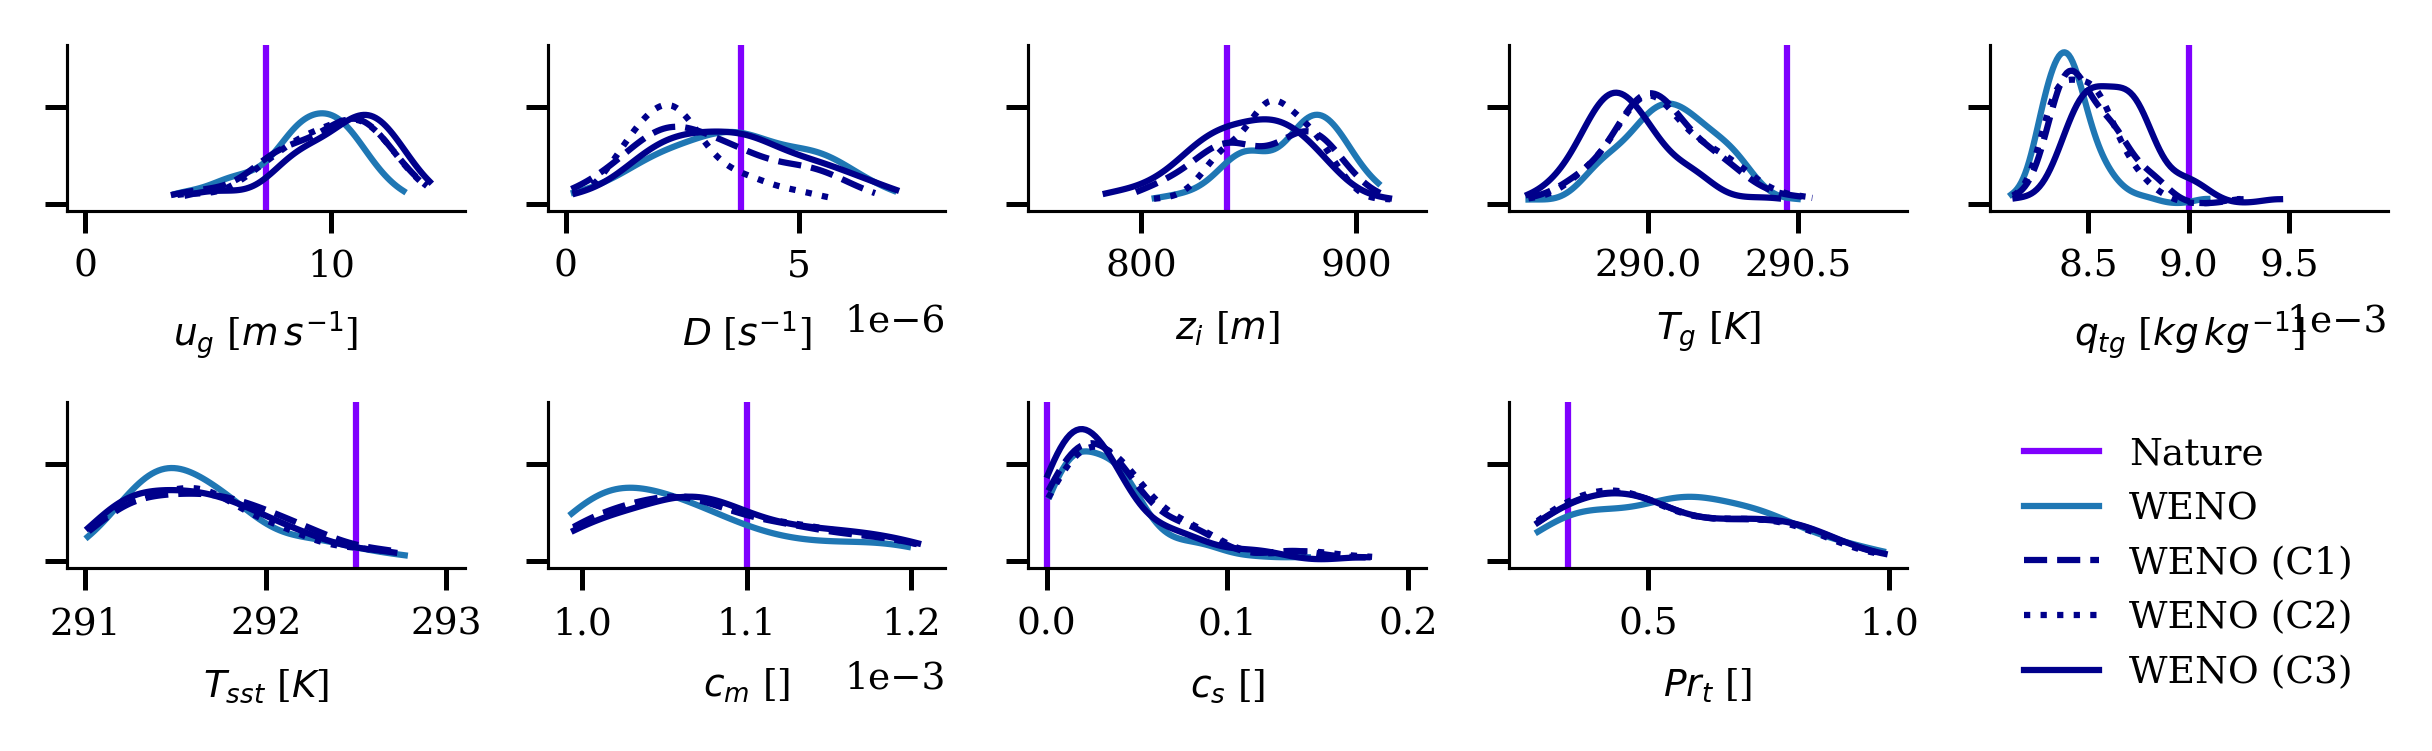

Saved figure  figs/dists_1d_CD/_fig-dist1d_WENO_FULLRES_constrained


In [10]:
# WENO only
model_name = "WENO_FULLRES"
plot_samples_1d(
    [
        DAs[model_name].analysis(constrained=True),
        DAs_loww[model_name].analysis(constrained=True),
        DAs_ztop[model_name].analysis(constrained=True),
        DAs_zbaseh[model_name].analysis(constrained=True),
    ],
    [
        "WENO",
        "WENO (C1)",
        "WENO (C2)",
        "WENO (C3)",
        
        # r"Original $C_D$",
        # "Case 1",
        # "Case 2",
        # "Case 3",

        # r"LOW $\overline{w'w'}$, $\overline{w'w'w'}$",
        # r"HIGH $z_{height}^{top}$, $z_{rate}^{top}$",
        # r"HIGH $z_{height}^{base}$",
    ],
    colors = [
        C_WENO_FULLRES,
        "darkblue",
        "darkblue",
        "darkblue",
    ],
    linestyles = [
        "-",
        "--",
        ":",
        "-",
    ],
    nature_params=PARAMS.defaults,
    do_samples=False,
    save_file=f"figs/dists_1d_CD/_fig-dist1d_{model_name}_constrained",
    lims="constrained",
)

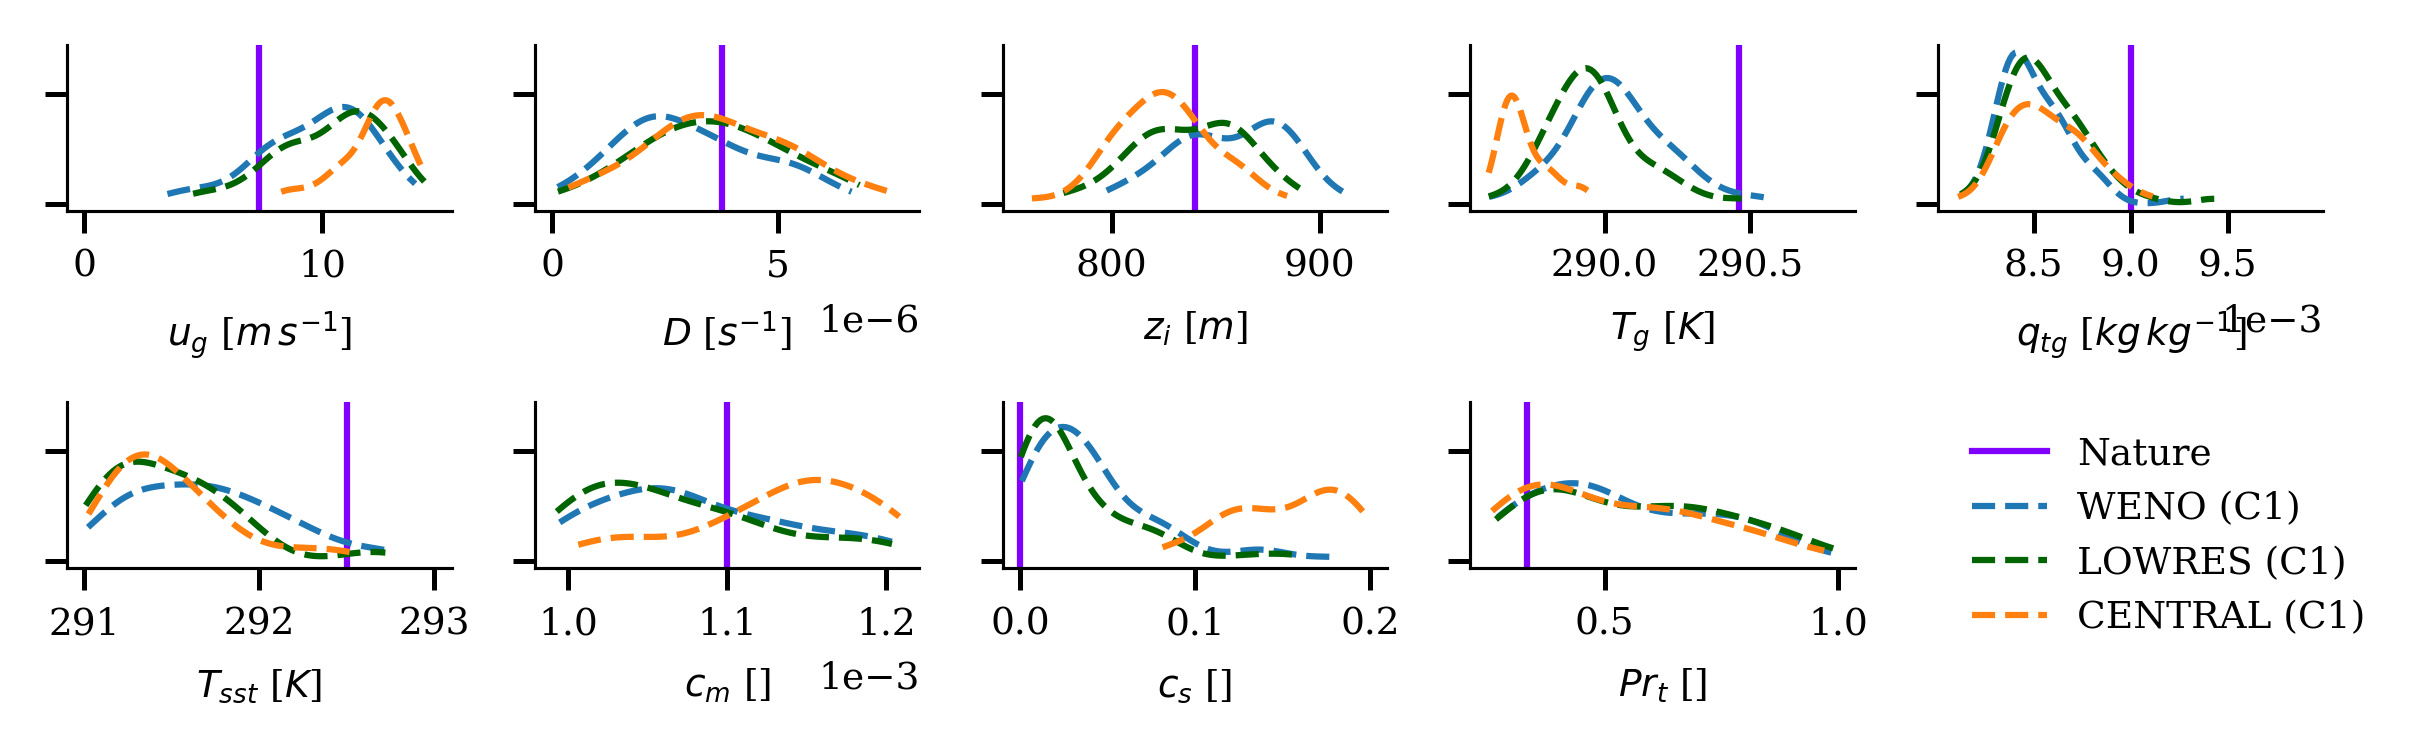

Saved figure  figs/dists_1d_CD/_fig-dist1d_case1_constrained


In [12]:
# only LOWRES and CENTRAL

plot_samples_1d(
    [
        DAs_loww["WENO_FULLRES"].analysis(constrained=True),
        DAs_loww["WENO_LOWRES"].analysis(constrained=True),
        DAs_loww["CENTRAL_FULLRES"].analysis(constrained=True),
    ],
    [
        "WENO (C1)",
        "LOWRES (C1)",
        "CENTRAL (C1)",
    ],
    colors = [
        C_WENO_FULLRES,
        C_WENO_LOWRES,
        C_CENTRAL,
        C_WENO_FULLRES,
        C_WENO_LOWRES,
        C_CENTRAL,
    ],
    linestyles = [
        "--",
        "--",
        "--",
    ],
    nature_params=PARAMS.defaults,
    do_samples=False,
    save_file=f"figs/dists_1d_CD/_fig-dist1d_case1_constrained",
    lims="constrained",
)

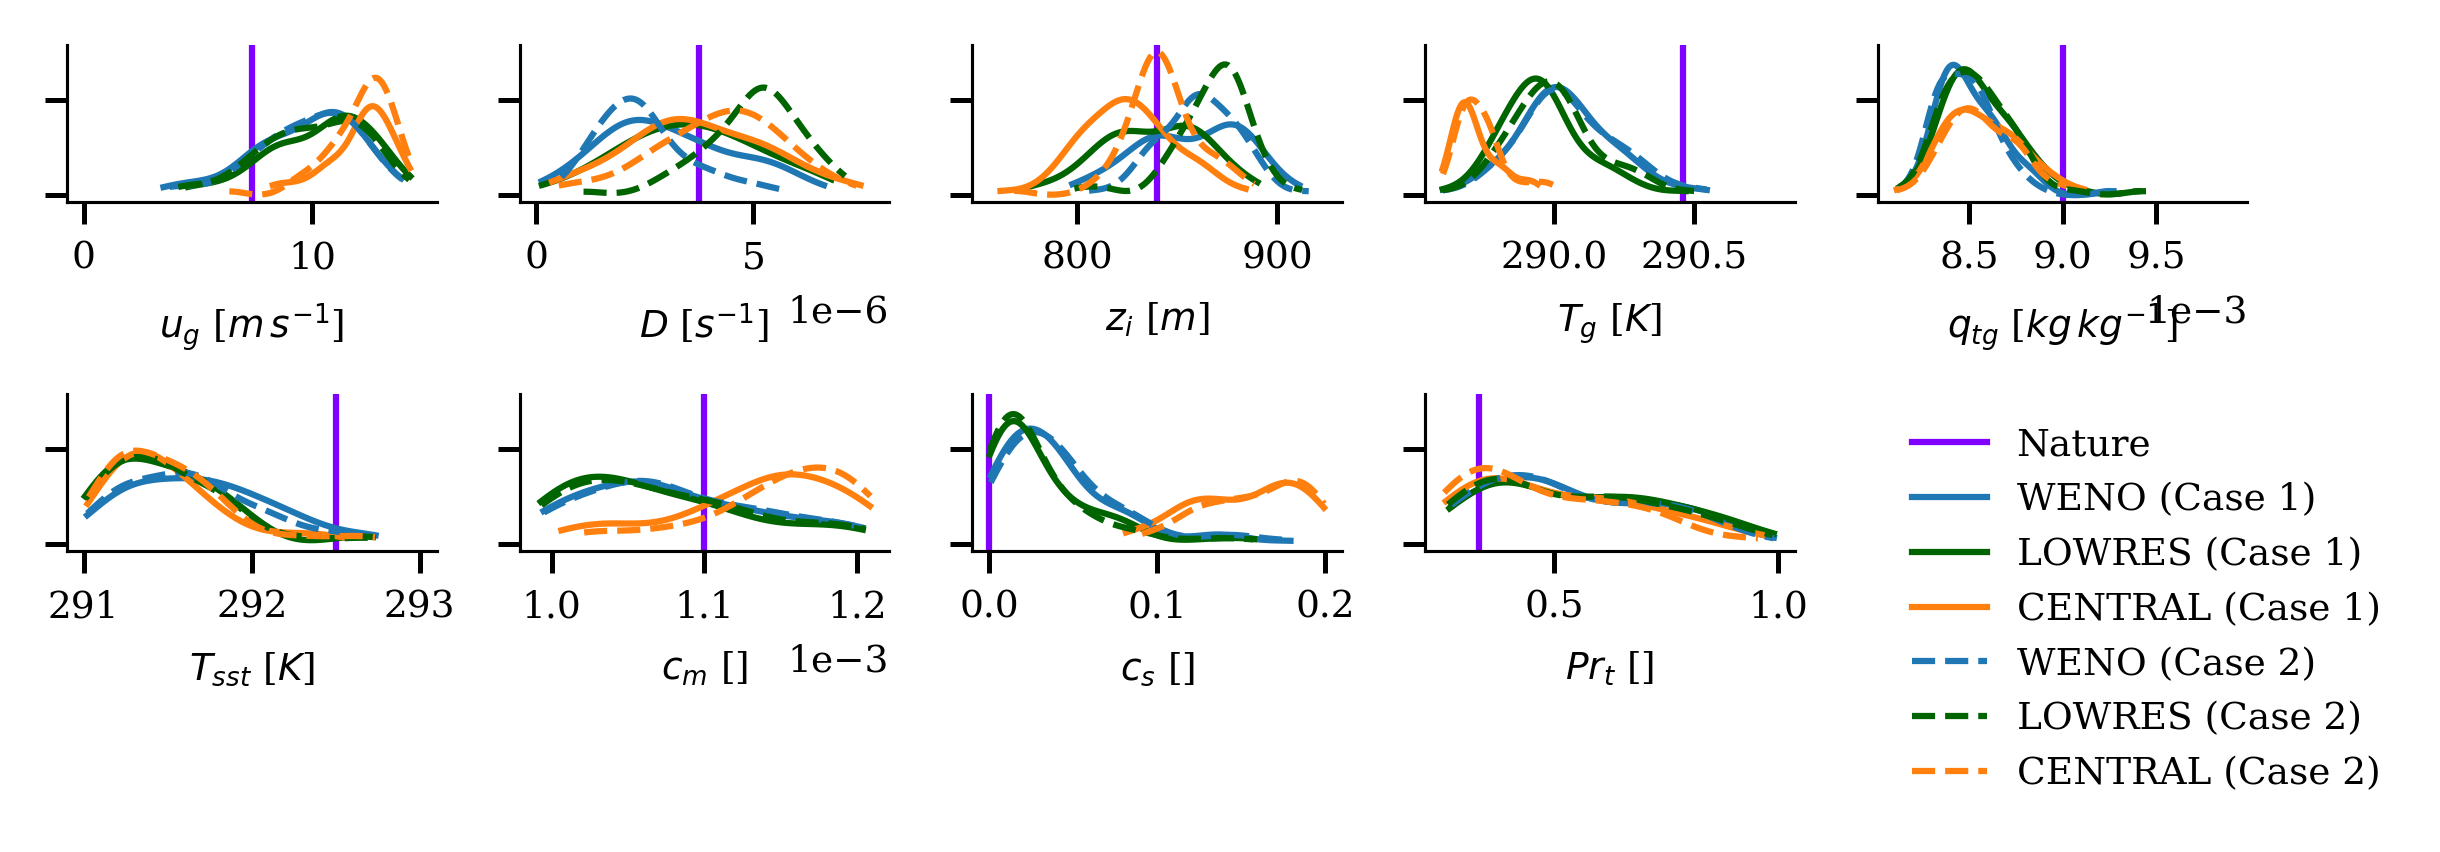

Saved figure  figs/dists_1d_CD/fig-dist1d_case2_constrained


In [24]:
# only LOWRES and CENTRAL

plot_samples_1d(
    [
        DAs_loww["WENO_FULLRES"].analysis(constrained=True),
        DAs_loww["WENO_LOWRES"].analysis(constrained=True),
        DAs_loww["CENTRAL_FULLRES"].analysis(constrained=True),
        DAs_ztop["WENO_FULLRES"].analysis(constrained=True),
        DAs_ztop["WENO_LOWRES"].analysis(constrained=True),
        DAs_ztop["CENTRAL_FULLRES"].analysis(constrained=True),
    ],
    [
        r"WENO (Case 1)",
        r"LOWRES (Case 1)",
        r"CENTRAL (Case 1)",
        r"WENO (Case 2)",
        r"LOWRES (Case 2)",
        r"CENTRAL (Case 2)",
    ],
    colors = [
        C_WENO_FULLRES,
        C_WENO_LOWRES,
        C_CENTRAL,
        C_WENO_FULLRES,
        C_WENO_LOWRES,
        C_CENTRAL,
    ],
    linestyles = [
        "-",
        "-",
        "-", # Inconsitent!
        "--",
        "--",
        "--",
    ],
    nature_params=PARAMS.defaults,
    do_samples=False,
    save_file=f"figs/dists_1d_CD/fig-dist1d_case2_constrained",
    lims="constrained",
)

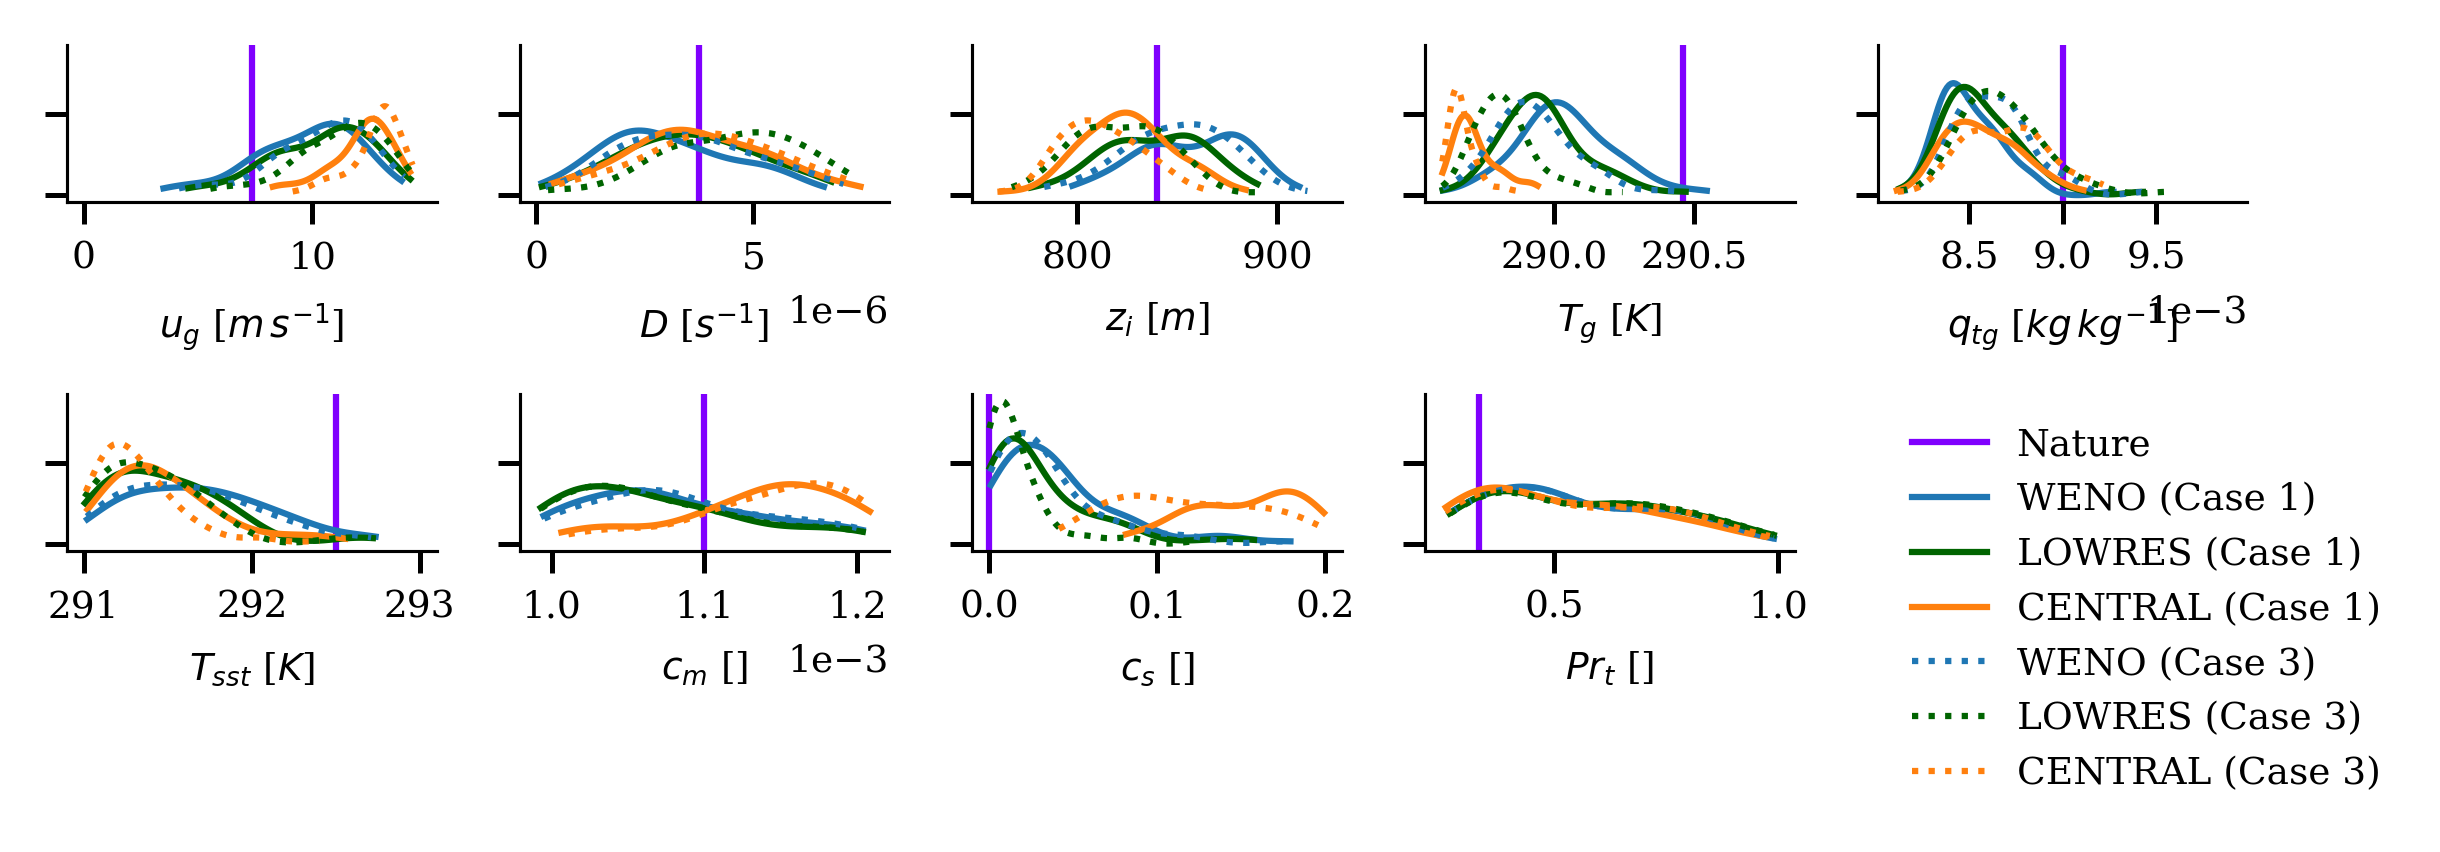

Saved figure  figs/dists_1d_CD/fig-dist1d_case3_constrained


In [25]:
# only LOWRES and CENTRAL

plot_samples_1d(
    [
        DAs_loww["WENO_FULLRES"].analysis(constrained=True),
        DAs_loww["WENO_LOWRES"].analysis(constrained=True),
        DAs_loww["CENTRAL_FULLRES"].analysis(constrained=True),
        DAs_zbaseh["WENO_FULLRES"].analysis(constrained=True),
        DAs_zbaseh["WENO_LOWRES"].analysis(constrained=True),
        DAs_zbaseh["CENTRAL_FULLRES"].analysis(constrained=True),
    ],
    [
        r"WENO (Case 1)",
        r"LOWRES (Case 1)",
        r"CENTRAL (Case 1)",
        r"WENO (Case 3)",
        r"LOWRES (Case 3)",
        r"CENTRAL (Case 3)",
    ],
    colors = [
        C_WENO_FULLRES,
        C_WENO_LOWRES,
        C_CENTRAL,
        C_WENO_FULLRES,
        C_WENO_LOWRES,
        C_CENTRAL,
    ],
    linestyles = [
        "-",
        "-",
        "-", # Inconsitent!
        ":",
        ":",
        ":",
    ],
    nature_params=PARAMS.defaults,
    do_samples=False,
    save_file=f"figs/dists_1d_CD/fig-dist1d_case3_constrained",
    lims="constrained",
)

In [14]:
### plot mode samples together for WENO

from data_loaders import load_nature

model_name = "WENO_FULLRES"
nature = load_nature(model_name)
ens = ensembles[model_name]

In [15]:
from data_loaders import load_mode

mode = load_mode(model_name,meas_name="REAL")
mode_loww = load_mode(model_name,meas_name="LOW-W")
mode_ztop = load_mode(model_name,meas_name="ZTOP")
mode_zbaseh = load_mode(model_name,meas_name="ZBASE-LOW-W")

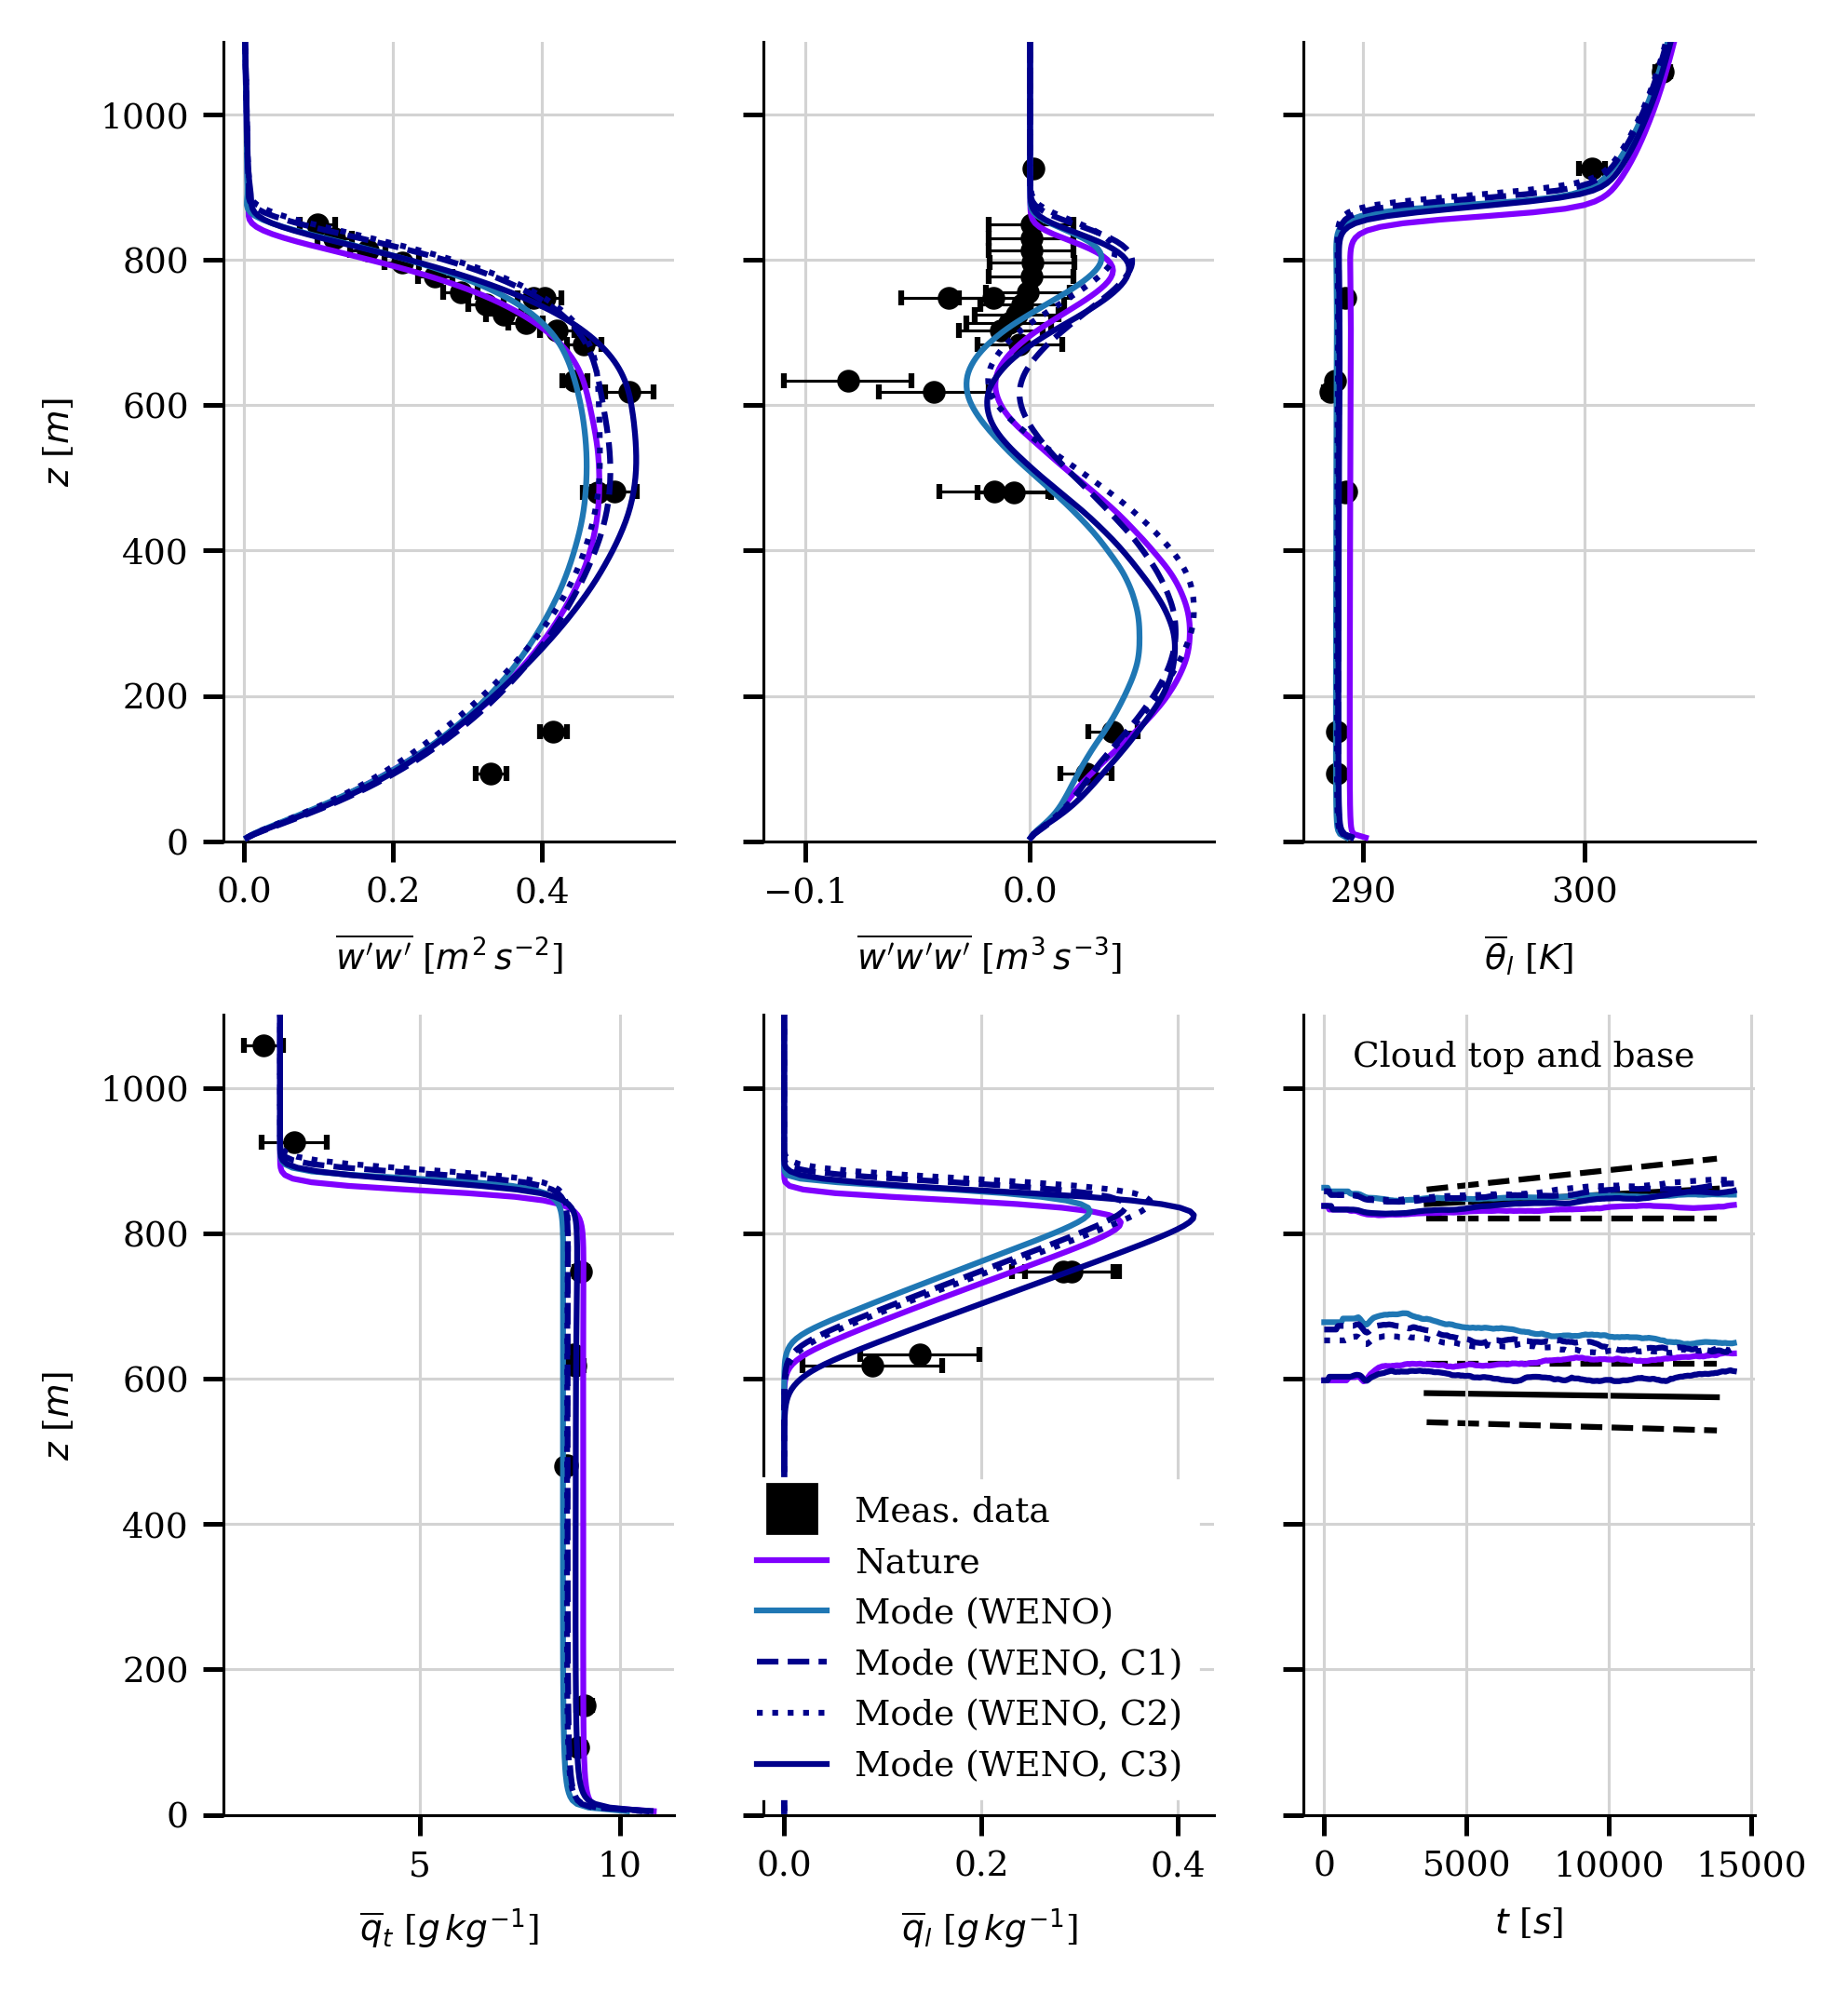

Saved figure  figs/dists_1d_CD/_fig-obs_WENO_FULLRES_mode


In [17]:
from calpycles.plotting.ens_obs import plot_ens_obs
plot_ens_obs(
    data=meas,
    nature=nature,
    nature_name="Nature",
    samples = [
        mode,
        mode_loww,
        mode_ztop,
        mode_zbaseh,
    ],
    sample_names = [
        "Mode (WENO)",
        "Mode (WENO, C1)",
        "Mode (WENO, C2)",
        "Mode (WENO, C3)",
    ],
    sample_colors = [
        COLORS[1],
        "darkblue",
        "darkblue",
        "darkblue",
    ],
    sample_linestyles = [
        "-",
        "--",
        ":",
        "-",
    ],
    save_file=f"figs/dists_1d_CD/_fig-obs_{model_name}_mode",
    cloud_height_type="mean",
)